# When Yelp Doesn't Help: Choosing the Best Bar (Chart)

### Using _bar charts_ to visualize a simple data set with five items for which some quantity has been measured across five categories, requires careful consideration of the questions that the visualization should help answer.

This notebook is based on [Streit & Gehlenborg, "Points of View: Bar charts and box plots", _Nature Methods_ **11**, 117 (2014)](https://www.nature.com/articles/nmeth.2807). Here I am demonstrating how to use [Altair](https://altair-viz.github.io/index.html) to re-create some of the figures from the paper.

In [55]:
import altair as alt

## Data Set

This is an artificial data set that contains five items for which some quantity was measured in five categories. A real world data set with this structure could be for instance the number of users of Twitter, Facebook, YouTube, Snapchat, and Instagram in North America, South America, Europe, Africa, and Asia.

In [56]:
# generate data table used in https://www.nature.com/articles/nmeth.2807
data = alt.Data(values = [{ 'category': 'A', 'item': '1', 'value': '6' },
                          { 'category': 'A', 'item': '2', 'value': '8' },
                          { 'category': 'A', 'item': '3', 'value': '12' },
                          { 'category': 'A', 'item': '4', 'value': '20' },
                          { 'category': 'A', 'item': '5', 'value': '22' },
                          { 'category': 'B', 'item': '1', 'value': '29' },
                          { 'category': 'B', 'item': '2', 'value': '27' },
                          { 'category': 'B', 'item': '3', 'value': '21' },
                          { 'category': 'B', 'item': '4', 'value': '18' },
                          { 'category': 'B', 'item': '5', 'value': '5' },
                          { 'category': 'C', 'item': '1', 'value': '18' },
                          { 'category': 'C', 'item': '2', 'value': '17' },
                          { 'category': 'C', 'item': '3', 'value': '16' },
                          { 'category': 'C', 'item': '4', 'value': '16' },
                          { 'category': 'C', 'item': '5', 'value': '15' },
                          { 'category': 'D', 'item': '1', 'value': '30' },
                          { 'category': 'D', 'item': '2', 'value': '12' },
                          { 'category': 'D', 'item': '3', 'value': '3' },
                          { 'category': 'D', 'item': '4', 'value': '9' },
                          { 'category': 'D', 'item': '5', 'value': '20' },
                          { 'category': 'E', 'item': '1', 'value': '7' },
                          { 'category': 'E', 'item': '2', 'value': '12' },
                          { 'category': 'E', 'item': '3', 'value': '19' },
                          { 'category': 'E', 'item': '4', 'value': '7' },
                          { 'category': 'E', 'item': '5', 'value': '1' }
                         ])

## Color Palette

I am using colors from a [color palette by Okabe & Ito](http://jfly.iam.u-tokyo.ac.jp/color/) that was designed to accommodate different types of color blindness. Select colors from the palette are mapped to the categories. [Mike Mol](https://www.twitter.com/mikemol) provides the color values in [various representations](https://mikemol.github.io/technique/colorblind/2018/02/11/color-safe-palette.html).

In [57]:
# map categories to colors from the Okabe & Ito color palette (http://jfly.iam.u-tokyo.ac.jp/color/)
oi_scale = alt.Scale(domain=['A', 'B', 'C', 'D', 'E'],
                  range=['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#E69F00'])

## Stacked Bar Chart

**Recommendation**: Use a stacked bar chart if the focus is on comparing the overall quantities across items but you also need to illustrate contributions of each category to the total.

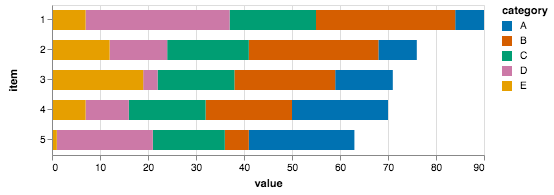

In [58]:
# create stacked bar chart
alt.Chart(data).mark_bar(size=20).encode(
    alt.X('value:Q'),
    alt.Y('item:N'),
    alt.Color('category:N',scale=oi_scale),
).properties(
    width=180*1.5*16/10,
    height=150
)

## Grouped Bar Chart

**Recommendation**: Use a grouped bar chart if the focus is on comparison of values across categories within each item, while still enabling comparisons across items.

_Note that if quantities add up to the same total for each item, then a grouped bar chart is equivalent to multiple pie charts, yet a grouped bar chart affords more accurate readings of values and comparisons._

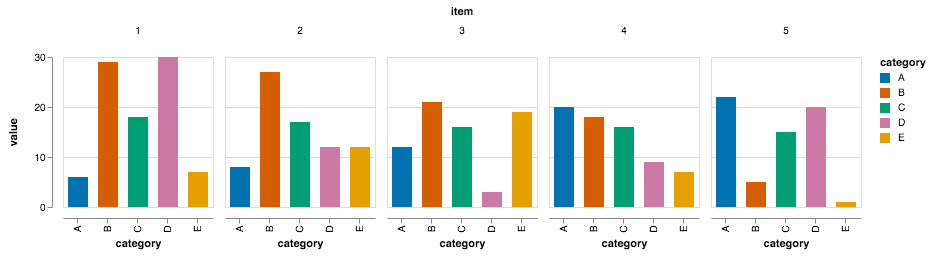

In [59]:
# create grouped bar chart
alt.Chart(data).mark_bar(size=20).encode(
    alt.Y('value:Q'),
    alt.X('category:N'),
    alt.Color('category:N',scale=oi_scale),
    alt.Column('item:N') # facet by item
).properties(
    width=150,
    height=150
)

## Layered Bar Chart

**Recommendation**: Use a layered bar chart if the focus is on the distribution of values in each category across all items. 

_Note that comparisons within each category are more accurate than in stacked bar charts due to common baseline for the values in each category._

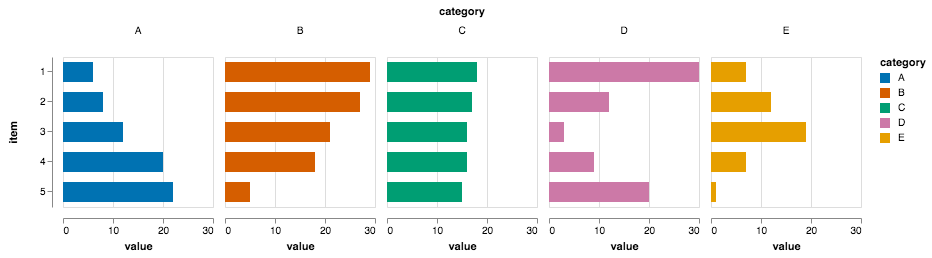

In [61]:
# create layered bar chart
alt.Chart(data).mark_bar(size=20).encode(
    alt.X('value:Q'),
    alt.Y('item:N'),
    alt.Color('category:N',scale=oi_scale),
    alt.Column('category:N') # facet by category
).properties(
    width=150,
    height=150
)